In [23]:
import reservoirpy as rpy

rpy.verbosity(0)  # no need to be too verbose here
rpy.set_seed(42)  # make everything reproducible!

### ESNの定義

In [24]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(100, lr=0.5, sr=0.9)
readout = Ridge(ridge=1e-7)

esn_model = reservoir >> readout

### 入力データの定義

In [25]:
import numpy as np

X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

X_train = X[:50]
Y_train = X[1:51]

### 学習

In [26]:
esn_model = esn_model.fit(X_train, Y_train, warmup=10)

print(reservoir.is_initialized, readout.is_initialized, readout.fitted)

True True True


### 結果の表示

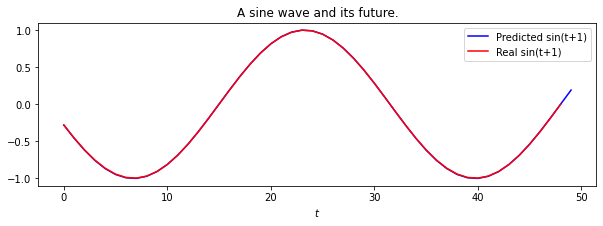

In [27]:
import matplotlib.pyplot as plt

Y_pred = esn_model.run(X[50:])

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t+1)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()
